In [2]:
!rm -rf ~/.cache/torch/transformers
!ls -als  ~/.cache/torch/transformers
!pip uninstall transformers -y
!pip uninstall torch -y
!pip install torch
!pip install transformers 

ls: cannot access /home/ec2-user/.cache/torch/transformers: No such file or directory
Found existing installation: transformers 3.5.0
Uninstalling transformers-3.5.0:
  Successfully uninstalled transformers-3.5.0
Found existing installation: torch 1.7.0
Uninstalling torch-1.7.0:
  Successfully uninstalled torch-1.7.0
     |████████████████████████████████| 776.7 MB 627 bytes/s a 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.3 MB 12.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.


In [35]:
import os
import torch
import pandas as pd
import numpy as np
import warnings
from transformers import (
    AutoTokenizer, AutoModelWithLMHead,GPT2Tokenizer,GPT2LMHeadModel,
    TextDataset,DataCollatorForLanguageModeling,LineByLineTextDataset,
    Trainer, TrainingArguments,
    WEIGHTS_NAME, CONFIG_NAME
)
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
output_dir="./4-train-gpt2-es-8h-512pos-toke-es-tweets-der"
pre_trained = "ensamblador/gpt2_espanol_8hx512pos"
train_path = 'train_dataset_der.txt'
test_path = 'test_dataset_der.txt'

In [36]:
!rm -rf {output_dir}

In [37]:
tokenizer = AutoTokenizer.from_pretrained(pre_trained, force_download=True,  
                                          cache_dir = output_dir)


tokenizer.pad_token = tokenizer.eos_token
print(tokenizer.eos_token)


#print('Train')
#!head -c 1000 {train_path}
#print('\n\nTest')
#!head -c 1000 {test_path}
#print('\n')




</s>


In [39]:
def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=train_path,
        block_size=512
    )
    test_dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=test_path,
        block_size=512
    )
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)
    return train_dataset,test_dataset,data_collator
train_dataset,test_dataset,data_collator = load_dataset(train_path,test_path,tokenizer)

In [40]:
base_index= 0
(tokenizer.decode(train_dataset[base_index+0]),
 tokenizer.decode(train_dataset[base_index+1]), 
 tokenizer.decode(train_dataset[base_index+2]), 
 tokenizer.decode(train_dataset[base_index+3]))

('#BuenasNoticias  de nuestro Pdte @sebastianpinera La #NuevaLeydeArriendos agilizará los juicios de arrendamiento y protegerá a los ciudadanos ante los arriendos a abusivos. La #NuevaLeydeArriendos también establecerá la figura de arriendo, subarriendo abusivo  Lamentablemente hoy la región recibió dos noticias que nos enlutan: el fallecimiento del fiscal Cristian Oróstica y un segundo femicidio en Lota. En nombre de la Intendencia y el Gobierno Regional envío sentidas condolencias a sus familias que están viviendo un duro momento.  Aquí la oposición hace festín con el aumento d casos Covid y escarba para aumentar las muertes artificialmente, pero el ícono d los Izquierdistas Maduro, en Vnzla. se proclama el mejor para contener la pandemia declarando sólo 4000 mil casos y 35 muertes. Ese si es cuento!  A partir de hoy y hasta el sábado tendremos un programa de Villancicos en diferentes plazas de la comuna. Los invito a las 19:30 horas, para que vayan con sus niños, mascotas y amigos. 

In [38]:
tokenizer.pad_token = tokenizer.eos_token
print(tokenizer.eos_token)

</s>


In [41]:
model = AutoModelWithLMHead.from_pretrained(pre_trained, force_download=True, cache_dir = output_dir )

print(model.config.vocab_size, tokenizer.vocab_size)
model.resize_token_embeddings(len(tokenizer))
print(model.config.vocab_size, tokenizer.vocab_size)

training_args = TrainingArguments(
    output_dir=output_dir, #The output directory
    #do_train=True,
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=10, # number of training epochs
    per_device_train_batch_size=2, # batch size for training
    per_device_eval_batch_size=4,  # batch size for evaluation
    eval_steps = 500, # Number of update steps between two evaluations.
    logging_steps=500,
    save_steps=1000, # after # steps model is saved
    evaluation_strategy="steps",
    #fp16=True,
    dataloader_drop_last=True,
    warmup_steps=250,# number of warmup steps for learning rate scheduler
)
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    prediction_loss_only=True,
)

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer.model.to(device);
trainer.get_train_dataloader().pin_memory=True;
trainer.get_eval_dataloader().pin_memory=True;
#trainer.get_eval_dataloader().drop_last =True;
#trainer.get_test_dataloader().pin_memory=True;


50000 50000
50000 50000


In [42]:
trainer.train();

Step,Training Loss,Validation Loss
500,4.124784,2.087270
1000,3.011175,1.809491
1500,2.697730,1.704435
2000,2.477206,1.668217
2500,2.343979,1.637680
3000,2.242080,1.622005
3500,2.167451,1.621153


Not all data has been set. Are you sure you passed all values?
Not all data has been set. Are you sure you passed all values?
Not all data has been set. Are you sure you passed all values?
Not all data has been set. Are you sure you passed all values?
Not all data has been set. Are you sure you passed all values?
Not all data has been set. Are you sure you passed all values?
Not all data has been set. Are you sure you passed all values?


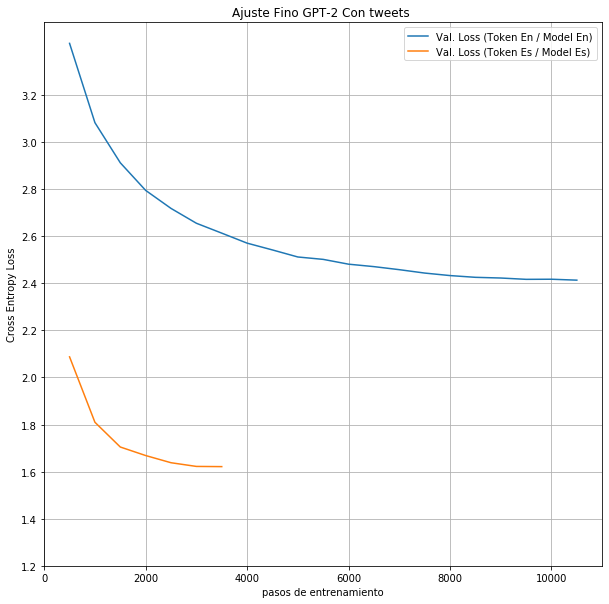

In [48]:
# Entrenamiento de modelo base GPT-2

metrics_en= np.array(
[[500,4.133486,3.418465],
[1000,3.349137,3.081711],
[1500,3.06739,2.911383],
[2000,2.911095,2.794125],
[2500,2.769497,2.717592],
[3000,2.704187,2.654608],
[3500,2.617998,2.612611],
[4000,2.578957,2.570129],
[4500,2.51651,2.541233],
[5000,2.479965,2.511363],
[5500,2.442482,2.501184],
[6000,2.401352,2.480789],
[6500,2.394402,2.470401],
[7000,2.362812,2.457464],
[7500,2.351285,2.443062],
[8000,2.314824,2.432421],
[8500,2.321051,2.424995],
[9000,2.297695,2.422021],
[9500,2.283355,2.416423],
[10000,2.271523,2.416886],
[10500,2.281578,2.412947]])



# Entrenamiento de modelo base GPT-2-es-8h-512pos
metrics_es_new = np.array(
[[500,4.124784,2.08727],
[1000,3.011175,1.809491],
[1500,2.69773,1.704435],
[2000,2.477206,1.668217],
[2500,2.343979,1.63768],
[3000,2.24208,1.622005],
[3500,2.167451,1.621153]])


import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,10))

plt.plot(metrics_en[:,0], metrics_en[:,2], label='Val. Loss (Token En / Model En)')
#plt.plot(metrics_es[:,0], metrics_es[:,2], label='Val. Loss (Token Es / Model En)')
plt.plot(metrics_es_new[:,0], metrics_es_new[:,2], label='Val. Loss (Token Es / Model Es) ')

ax.grid()

ax.set(xlabel='pasos de entrenamiento', ylabel='Cross Entropy Loss',
       title='Ajuste Fino GPT-2 Con tweets ')
plt.yticks(np.arange(1.2, 3.4, step=0.2))
plt.legend()

In [8]:
trainer.save_model()

In [9]:
# creating directory if it is not present
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
output_model_file = os.path.join(output_dir, WEIGHTS_NAME)
output_config_file = os.path.join(output_dir, CONFIG_NAME)

# save model and model configs
model.save_pretrained(output_dir)
model_to_save.config.to_json_file(output_config_file)

# save tokenizer
tokenizer.save_pretrained(output_dir)

('./4-train-gpt2-es-8h-512pos-toke-es-tweets-der/tokenizer_config.json',
 './4-train-gpt2-es-8h-512pos-toke-es-tweets-der/special_tokens_map.json',
 './4-train-gpt2-es-8h-512pos-toke-es-tweets-der/vocab.json',
 './4-train-gpt2-es-8h-512pos-toke-es-tweets-der/merges.txt',
 './4-train-gpt2-es-8h-512pos-toke-es-tweets-der/added_tokens.json')

## Probando el modelo

In [22]:
#output_dir="./ensamblador-tweets"
model = AutoModelWithLMHead.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(pre_trained)

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

In [37]:
bad_words_ids =[ 
    tokenizer.encode('|', add_prefix_space=True)]


def test_model(device, model, text):
    input_ids = tokenizer.encode(text, return_tensors='pt').to(device) # getting out output
    #attention_mask = tokenizer.encode(seeds, return_tensors='pt').to(device)
    
    print("generando beams para input: ", text,"\n==================================================")
    beam_output = model.generate(
        input_ids,
        max_length = 190,
        min_length = 50,
        early_stop=True,
        do_sample=True,
        top_k=100, 
        top_p=0.9,
        num_beams = 10,
        bad_words_ids = bad_words_ids,
        temperature = 1,
        #length_penalty=2,
        no_repeat_ngram_size=2,
        #repetition_penalty=2.0,
        num_return_sequences=10,
        bos_token_id = tokenizer.bos_token_id,
        eos_token_id = tokenizer.eos_token_id,
        pad_token_id =tokenizer.pad_token_id
    )
    
    decoded_beams = []
    
    
    for beam in beam_output:   
        decoded_beams.append({'text':text, 'generado':tokenizer.decode(beam)})
        #print ("\n\n",tokenizer.decode(beam))
        
    return decoded_beams

In [40]:
generated = test_model(device, model, "Con los vecinos ")

generando beams para input:  Con los vecinos  


In [41]:
pd.DataFrame.from_records(generated)

,text,generado
0,Con los vecinos,"Con los vecinos 👇 #ColinaSomosTodos Ahora son tres formas de donar a quien lo necesita: arma tu caja y entrégala en la oficina de Los Ingleses; llámanos y recogemos tu casa; o entra a y sigue el link para comprar una caja en sencillos pasos. @mario_olavarria En el #DíaMundialContraElTrabajoInfantil, el Int.(s)@iurcullu junto a la Gob.@NellyGaleb, alcalde #JuanPabloBarros y otras autoridades hicieron entrega de un reconocimiento a los trabajadores de la Provincia de #Melipilla por el trabajo realizado en el marco del #PlanVeterinarioEnTerreno. Felicitaciones a todos los voluntarios que día a día realizan esta gran labor. #ChileLoHacemosTodos ¡ATENCIÓN VECINOS DE"
1,Con los vecinos,"Con los vecinos 🙌 #CuidaTuVida El @MinDesarrollo presentó la página, para consultar por el pago del #IngresoDeEmergencia, una importante ayuda en la pandemia de #COVID19. Recuerda que ya no es necesaria la #ClaveUnica para solicitar este beneficio. Te dejamos también a algunos participantes (entre 10 y 12 años) para conocer de qué se está haciendo para ayudar a más familias en este difícil momento de pandemia. [AHORA] Gobernadora de San Antonio, María Paz Santelices, participa de una nueva sesión del Sistema Táctico Operativo Policial (STOP) del Ministerio de Justicia. #ChileLoCuidamosTodos En el #DíaMundialContraElCoronavirus, el Int.@UrquietaAtacama junto a la Gob.(s)@NellyGaleb, al Alcalde(s),"
2,Con los vecinos,"Con los vecinos 👇 @mario_olavarria #CuidaTuVida Te dejamos los días y horarios de atención de #DIDECOEnTuBarrio, en las sedes de las juntas de vecinos. Recuerda que debes asistir con tu permiso de, con mascarilla y manteniendo la distancia. Cuídese en casa ⤵️ Hoy el Int.@UrquietaAtacama junto al Jefe de la III Zona, Gral. Tobar y al Gob. del Pdte. (s)@iurcullu, dieron inicio a la 2da entrega de cajas de mercadería #AlimentosParaChile, que beneficiará a más de 3 millones de personas del país. Te invitamos a apoyar con la campaña #EligeVivirSano a través del Programa de Mejoramiento Urbano. ¡BUENAS NOTICIAS!"
3,Con los vecinos,"Con los vecinos 👉 #CuidaTuVida Si estás buscando un regalo para tu papá, te invitamos a la Vitrina Virtual del #CentroDelEmprendedor para el #DiaDelPadre. Encuentra ese obsequio perfecto para este día tan especial. Te dejamos también a algunos participantes (1 de 3). @mario_olavarria ¡ATENCIÓN VECINOS! Desde hoy podrás postular a los diplomados de #FomentoPropietario. Postula en el siguiente link⤵️ Más info: ➡Subsidios de arriendo. Infórmate en y #RMdeTodos✅ #ChileEnMarcha Virginia Reginato #Covid_19 #QuedateEnCasa #CoronaVirusEnChile #NosCuidamosEntreTodos Hoy estuvimos en"
4,Con los vecinos,"Con los vecinos 👇 #CuidaTuVida Si estás buscando un regalo para tu papá, te invitamos a la Vitrina Virtual del #CentroDelEmprendedor para el #DiaDelPadre. Encuentra ese obsequio perfecto para este día tan especial. Te dejamos también a algunos participantes (1 de 3). @mario_olavarria En el Gob. Del Pdte.@sebastianpinera estamos comprometidos con el desarrollo de la región de #Tarapacá y de nuestro país, con una mirada de desarrollo sostenible y sustentable. #Iquique #AltoHospicio. ⏰A esta hora, en #Tocopilla, #GastónLibuy, Jefe de gabinete #SebastianGallardo, junto a alcalde #JuanPabloBarros y otras autoridades, participan en ceremonia de entrega de escrituras de terrenos donde se construirán las viviendas"
5,Con los vecinos,"Con los vecinos @Muni_provi. 🔹️OPORTUNIDAD LABORAL: Empresa Agroservicios MVC, requiere contratar: -02 personas para trabajar en la Dirección de Obras Hidráulicas (SBA). Interesados, acercarse a la OMIL de la Municipalidad de San Pedro, a través de nuestro Departamento de Transportes, para… #CuidaTuVida DIDECO va a tu barrio: Un nuevo servicio para que hagas consultas y resuelvas tus dudas sobre esta dirección del municipio. Solo se atenderá con permiso de, con mascarilla y manteniendo la distancia. Cupos limitados. o contáctennos en claudia.teustch@@colinadeportes.cl ¡ATE

In [42]:
generated

[{'text': 'Con los vecinos ',
  'generado': 'Con los vecinos 👇   #ColinaSomosTodos Ahora son tres formas de donar a quien lo necesita: arma tu caja y entrégala en la oficina de Los Ingleses; llámanos y recogemos tu casa; o entra a  y sigue el link para comprar una caja en sencillos pasos. @mario_olavarria  En el #DíaMundialContraElTrabajoInfantil, el Int.(s)@iurcullu junto a la Gob.@NellyGaleb, alcalde #JuanPabloBarros y otras autoridades hicieron entrega de un reconocimiento a los trabajadores de la Provincia de #Melipilla por el trabajo realizado en el marco del #PlanVeterinarioEnTerreno. Felicitaciones a todos los voluntarios que día a día realizan esta gran labor. #ChileLoHacemosTodos  ¡ATENCIÓN VECINOS DE'},
 {'text': 'Con los vecinos ',
  'generado': 'Con los vecinos 🙌  #CuidaTuVida El @MinDesarrollo presentó la página, para consultar por el pago del #IngresoDeEmergencia, una importante ayuda en la pandemia de #COVID19. Recuerda que ya no es necesaria la #ClaveUnica para solicita

In [43]:
generated2 = test_model(device, model, "Vamos con todo ")

generando beams para input:  Vamos con todo  


In [44]:
generated2

[{'text': 'Vamos con todo ',
  'generado': 'Vamos con todo 🇨�  #CuidaTuVida DIDECO va a tu barrio: Un nuevo servicio para que hagas consultas y resuelvas tus dudas sobre esta dirección del municipio. Solo se atenderá con permiso de, con mascarilla y manteniendo la distancia. Cupos limitados. @mario_olavarria  En el #DiaMundialContraElCoronavirus, el Int.@UrquietaAtacama junto al Jefe de la Defensa Nacional, Gral. Heyermann, dieron a conocer el primer caso de contagio en la comuna de #Copiapó. Te invitamos a ver el vídeo:  ➡️ #PlanDeInviernoSeguro Para que el invierno no te pille desprevenido, te dejamos algunos consejos que puedes aplicar para tener tu casa segura y así te cuides y a tus mascotas. Más info en⤵�'},
 {'text': 'Vamos con todo ',
  'generado': 'Vamos con todo 💪  #ColinaSomosTodos Ahora son tres formas de donar a quien lo necesita: arma tu caja y entrégala en la oficina de Los Ingleses; llámanos y recogernos en tu casa; o entra a  y sigue el link para comprar una caja en se

In [45]:
generated3 = test_model(device, model, "El 27 de enero del año 2010 ")

generando beams para input:  El 27 de enero del año 2010  


In [46]:
generated3

[{'text': 'El 27 de enero del año 2010 ',
  'generado': 'El 27 de enero del año 2010 @ministeriosalud entregó balance #COVID_19: 4.641 casos nuevos; 3.054, en total. 9 fallecidos; 50.708 exámenes PCR; 354.842 en la UCI. 1.951 VM; 372 estado crítico.  REPORTE EN:  🔹️OPORTUNIDAD LABORAL: Empresa Agroservicios MVC, requiere contratar para sus trabajos a un costado de la empresa CGE, para que realice trabajos de reparación de maquinaria y reposición de las parrillas de aguas servidas en el lugar.…  #CuidaTuVida Si estás buscando un regalo para tu papá, te invitamos a la Vitrina Virtual del #CentroDelEmprendedor para el #DiaDelPadre. Encuentra ese obsequio perfecto para este día tan especial. Te'},
 {'text': 'El 27 de enero del año 2010 ',
  'generado': 'El 27 de enero del año 2010 🔴 A esta hora, Gob. @RAMIREZCHILE recibe a los vecinos de la Provincia de #Melipilla, en el marco del programa #PlanVeterinarioEnTerreno, financiado por la #Subdere. #RMdeTodos✅  #CuidémonosEntreTodos  El #Mercad

In [47]:
generated4 = test_model(device, model, "El presidente  ")

generando beams para input:  El presidente   


In [48]:
generated4

[{'text': 'El presidente  ',
  'generado': 'El presidente  @sebastianpinera anunció el plan de desconfinamiento gradual Paso a Paso #NosCuidamos que beneficiará a miles de familias de la #RMdeTodos. El Int.@UrquietaAtacama junto a la Seremi(s)@KimFaBondi, y diversas autoridades hicieron entrega de este importante apoyo a las familias que más lo necesitan.🙌  El #MercadoCampesino ya cuenta con la aplicación YoiFerias, donde puedes conocer sobre los productos que puedes encontrar, los precios y días que están disponibles. Entra a  y comienza ya a usarla. Te dejamos también un video explicativo. #ColinaSomosTodos Ahora son tres formas de donar a quien lo necesita: arma tu arma y entrégala en la oficina de Los Ingleses; llámanos y recogemos tu caja en tu casa; o entra a y sigue'},
 {'text': 'El presidente  ',
  'generado': 'El presidente  @sebastianpinera promulgó la ley de #ProtecciónDelEmpleo, una importante ayuda en la pandemia del #COVID19. Revisa más info aquí⤵️  #CuidémonosEntreTodos 

In [34]:
model.config

GPT2Config {
  "_name_or_path": "ensamblador/gpt2_espanol_8hx512pos",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 0,
  "embd_pdrop": 0.1,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 512,
  "n_embd": 768,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 512,
  "pad_token_id": 1,
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "vocab_size": 50000
}

In [63]:
with open(test_path, 'r') as f:
    test = f.read()

with open(train_path, 'r') as g:
    train = g.read()

    
    
len(train),len(test)

(5690881, 1006141)

In [64]:
encodings_test = tokenizer(test, return_tensors='pt')
encodings_train = tokenizer(train, return_tensors='pt')

In [65]:
max_length = 512 #model.config.n_positions
stride = 512

lls = []
for i in range(0, encodings_test.input_ids.size(1), stride):
    begin_loc = max(i + stride - max_length, 0)
    end_loc = min(i + stride, encodings_test.input_ids.size(1))
    trg_len = end_loc - i    # may be different from stride on last loop
    input_ids = encodings_test.input_ids[:,begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:,:-trg_len] = -100
    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)
        log_likelihood = outputs[0] * trg_len
    lls.append(log_likelihood)
ppl_test = torch.exp(torch.stack(lls).sum() / end_loc)



lls = []
for i in range(0, encodings_train.input_ids.size(1), stride):
    begin_loc = max(i + stride - max_length, 0)
    end_loc = min(i + stride, encodings_train.input_ids.size(1))
    trg_len = end_loc - i    # may be different from stride on last loop
    input_ids = encodings_train.input_ids[:,begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:,:-trg_len] = -100
    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)
        log_likelihood = outputs[0] * trg_len
    lls.append(log_likelihood)
ppl_train = torch.exp(torch.stack(lls).sum() / end_loc)


In [68]:
ppl_test.tolist(), ppl_train.tolist()

(18.37270736694336, 8.33980941772461)

In [61]:
np.log(ppl.tolist()) 

2.9106168752708537

In [55]:
!head -c 1000 {test_path}


@RodrigoVergaraR @izkia @colmedchile @GobiernodeChile Totalmente. Se lo dije personalmente. Incluyo al colegio médico dentro de los que saben de salud ciertamente  @pazoyarzunm @EnelClientesCL @SEC_cl mandeme por interno su dirección  @VirginiaMigani @Muni_provi Si virginia, de hecho modificamos ordenanza porque somos los primeros que debemos dar el ejemplo. Mira en  la noticia.  Atención vecinos/as de la Provincia Si perdiste tu empleo en el último tiempo, te invitamos a postular a uno de los 50 mil cupos de capacitación online que ofrece el @sencechile y @coursera. Capacítate en las áreas más demandadas por el mundo laboral. .  El joven cineasta chilote, Rory Barrientos Lamas, ganó en su categoría, en el 17th IFF Pacific Meridian Festival de Cine #Rusia, con su película documental inspirada en la vida del boxeador local Carlos “Guru Guru” Ruíz. ! Un justo homenaje a un gran deportista !!  Si se van de vacaciones, les recomiendo solicitar el servicio Encárganos tu Cas

In [56]:
!head -c 1000 {train_path}

#BuenasNoticias  de nuestro Pdte @sebastianpinera La #NuevaLeydeArriendos agilizará los juicios de arrendamiento y protegerá a los ciudadanos ante los arriendos a abusivos. La #NuevaLeydeArriendos también establecerá la figura de arriendo, subarriendo abusivo  Lamentablemente hoy la región recibió dos noticias que nos enlutan: el fallecimiento del fiscal Cristian Oróstica y un segundo femicidio en Lota. En nombre de la Intendencia y el Gobierno Regional envío sentidas condolencias a sus familias que están viviendo un duro momento.  Aquí la oposición hace festín con el aumento d casos Covid y escarba para aumentar las muertes artificialmente, pero el ícono d los Izquierdistas Maduro, en Vnzla. se proclama el mejor para contener la pandemia declarando sólo 4000 mil casos y 35 muertes. Ese si es cuento !  A partir de hoy y hasta el sábado tendremos un programa de Villancicos en diferentes plazas de la comuna. Los invito a las 19:30 horas, para que vayan con sus niños, masc

In [26]:
model = AutoModelWithLMHead.from_pretrained('gpt2')

torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);

tokenizer = AutoTokenizer.from_pretrained('gpt2')
encodings = tokenizer(test, return_tensors='pt')

max_length = 256 #model.config.n_positions
stride = 512

lls = []
for i in range(0, encodings.input_ids.size(1), stride):
    begin_loc = max(i + stride - max_length, 0)
    end_loc = min(i + stride, encodings.input_ids.size(1))
    trg_len = end_loc - i    # may be different from stride on last loop
    input_ids = encodings.input_ids[:,begin_loc:end_loc].to(device)
    target_ids = input_ids.clone()
    target_ids[:,:-trg_len] = -100

    with torch.no_grad():
        outputs = model(input_ids, labels=target_ids)
        log_likelihood = outputs[0] * trg_len

    lls.append(log_likelihood)

ppl2 = torch.exp(torch.stack(lls).sum() / end_loc)
ppl2.tolist()

Token indices sequence length is longer than the specified maximum sequence length for this model (373074 > 1024). Running this sequence through the model will result in indexing errors


148.36532592773438